In [58]:
import os
import json
import shutil
import random, math
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [59]:
# Load Maureens annotations
csv_files = glob("data/sites/csv/**/*.csv", recursive=True)
sorted_csv_files = sorted(csv_files, key=lambda x: x.split("/")[-1])
initialiser, remainder = sorted_csv_files[0], sorted_csv_files[1:]
df = pd.read_csv(initialiser, encoding="ISO-8859-1")
for file in remainder:
    site = pd.read_csv(file, encoding="ISO-8859-1")
    df = pd.concat([df, site])
df.camera_reaction.replace({"ues": "yes"}, inplace=True)
df["subdir_video"] = df.subfolder.astype(str) + "_" + df.video_file_name.astype(str)
df.subdir_video = df.subdir_video.apply(lambda x: x.lower())
df.subdir_video = df.subdir_video.str.split(".").str[0]
df["prepend_zero"] = df.subdir_video.apply(
    lambda x: f'{"_".join(x.split("_")[:-1])}_{"0" + x.split("_")[-1]}'
)

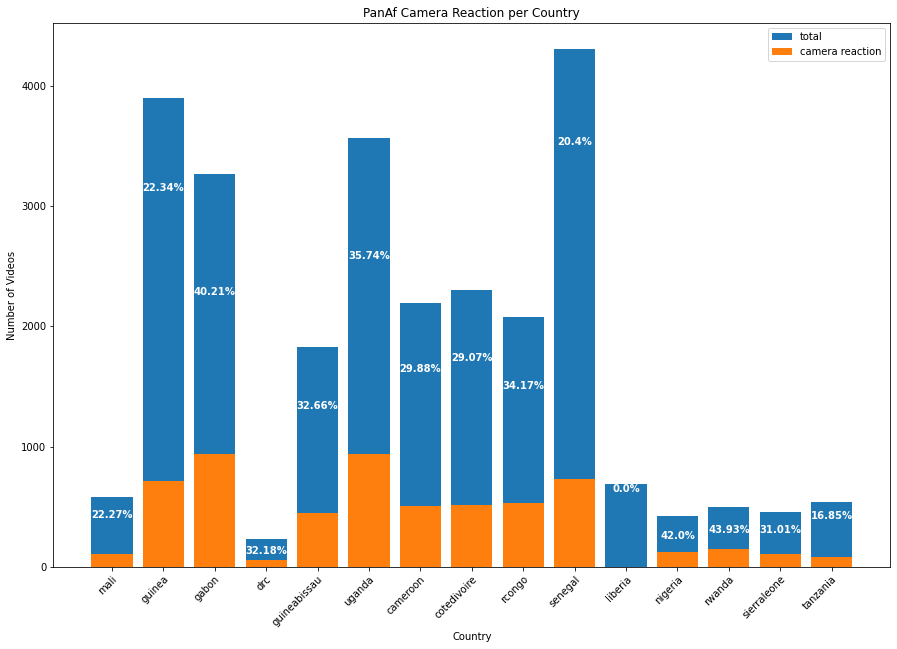

In [60]:
country_dict = {}
for country in df.country.unique():
    country_dict[country] = {}
    tmp = df[df.country == country]
    try:
        country_dict[country]["yes"] = (
            tmp.groupby("subdir_video")["camera_reaction"]
            .apply(lambda x: True if "yes" in list(x) else False)
            .value_counts()
            .values[1]
        )
    except:
        country_dict[country]["yes"] = 0
    try:
        country_dict[country]["no"] = (
            tmp.groupby("subdir_video")["camera_reaction"]
            .apply(lambda x: True if "yes" in list(x) else False)
            .value_counts()
            .values[0]
        )
    except:
        country_dict[country]["no"] = 0

    country_dict[country]["total"] = (
        country_dict[country]["yes"] + country_dict[country]["no"]
    )

    country_dict[country]["yes_percentage"] = (
        country_dict[country]["yes"] / country_dict[country]["total"]
    )

# Plot the number of yes and no reactions per country with legend
fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(
    list(country_dict.keys()),
    [country_dict[country]["total"] for country in country_dict.keys()],
    bottom=[country_dict[country]["yes"] for country in country_dict.keys()],
    label="total",
)
bar2 = ax.bar(
    list(country_dict.keys()),
    [country_dict[country]["yes"] for country in country_dict.keys()],
    label="camera reaction",
)

# place percentage yes  on top of bar
for i, country in enumerate(country_dict.keys()):
    ax.text(
        i,
        country_dict[country]["total"],
        f"{round(country_dict[country]['yes_percentage'] * 100, 2)}%",
        ha="center",
        va="top",
        color="white",
        fontweight="bold",
    )
ax.set_ylabel("Number of Videos")
ax.set_xlabel("Country")
ax.set_title("PanAf Camera Reaction per Country")
# rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend()
plt.savefig("camera_reaction_per_country_multi.png", bbox_inches="tight")
plt.show()

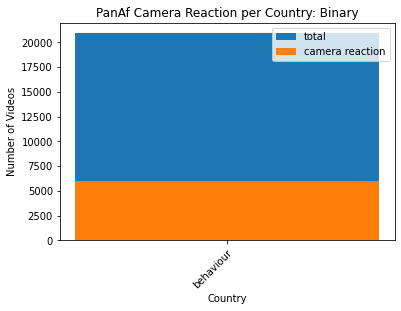

In [62]:
country_dict
total, yes = 0, 0
for k, v in country_dict.items():
    total += v["total"]
    yes += v["yes"]
# Plot yes overlayed on total
fig, ax = plt.subplots()
bar1 = ax.bar(
    ["behaviour"],
    total,
    label="total",
)
bar2 = ax.bar(
    ["behaviour"],
    yes,
    label="camera reaction",
)
ax.set_ylabel("Number of Videos")
ax.set_xlabel("Country")
ax.set_title("PanAf Camera Reaction per Country: Binary")
# rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.savefig("camera_reaction_per_country_binary.png", bbox_inches="tight")
ax.legend()
plt.show()

In [64]:
# CNS
train = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/train.csv"
)
train_meta = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/train_metadata.csv"
)
train = train.merge(train_meta, on="video")

test = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/test.csv"
)
test_meta = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/test_metadata.csv"
)
test = test.merge(test_meta, on="video")

val = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/val.csv"
)
val_meta = pd.read_csv(
    "/home/dl18206/Desktop/phd/data/panaf/chimp_and_see/data/internal/splits/final/multilabel/val_metadata.csv"
)
val = val.merge(val_meta, on="video")

In [65]:
df = pd.concat([train, test, val])

In [66]:
# remove nan key from dictionary

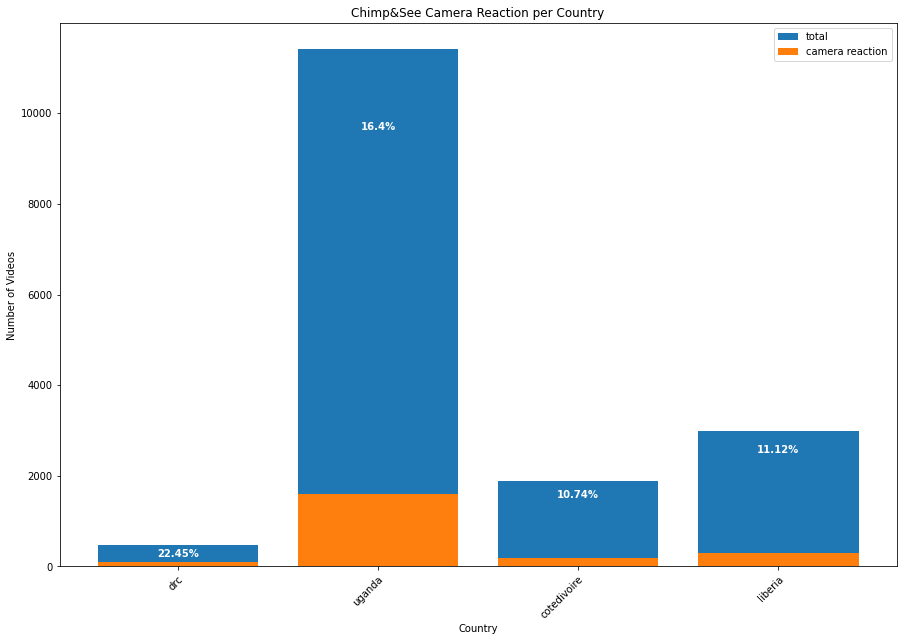

In [67]:
country_dict = {}
for country in df.country.unique():
    country_dict[country] = {}
    tmp = df[df.country == country]

    tmp.p_camera_reaction.value_counts()

    try:
        country_dict[country]["yes"] = tmp.p_camera_reaction.value_counts().values[1]
    except:
        country_dict[country]["yes"] = 0
    try:
        country_dict[country]["no"] = tmp.p_camera_reaction.value_counts().values[0]
    except:
        country_dict[country]["no"] = 0

    country_dict[country]["total"] = (
        country_dict[country]["yes"] + country_dict[country]["no"]
    )
    try:
        country_dict[country]["yes_percentage"] = (
            country_dict[country]["yes"] / country_dict[country]["total"]
        )
    except:
        country_dict[country]["yes_percentage"] = 0

country_dict.pop(np.nan, None)

# Plot the number of yes and no reactions per country with legend
fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(
    list(country_dict.keys()),
    [country_dict[country]["total"] for country in country_dict.keys()],
    bottom=[country_dict[country]["yes"] for country in country_dict.keys()],
    label="total",
)
bar2 = ax.bar(
    list(country_dict.keys()),
    [country_dict[country]["yes"] for country in country_dict.keys()],
    label="camera reaction",
)

# place percentage yes  on top of bar
for i, country in enumerate(country_dict.keys()):
    ax.text(
        i,
        country_dict[country]["total"],
        f"{round(country_dict[country]['yes_percentage'] * 100, 2)}%",
        ha="center",
        va="top",
        color="white",
        fontweight="bold",
    )
ax.set_ylabel("Number of Videos")
ax.set_xlabel("Country")
ax.set_title("Chimp&See Camera Reaction per Country")
# rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend()
plt.savefig("cns_camera_reaction_per_country.png", bbox_inches="tight")
plt.show()

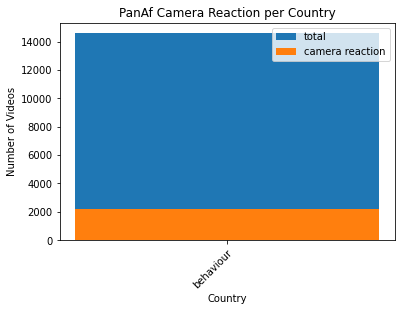

In [56]:
country_dict
total, yes = 0, 0
for k, v in country_dict.items():
    total += v["total"]
    yes += v["yes"]
# Plot yes overlayed on total
fig, ax = plt.subplots()
bar1 = ax.bar(
    ["behaviour"],
    total,
    label="total",
)
bar2 = ax.bar(
    ["behaviour"],
    yes,
    label="camera reaction",
)
ax.set_ylabel("Number of Videos")
ax.set_xlabel("Country")
ax.set_title("PanAf Camera Reaction per Country")
# rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend()